# importing necessary libraries for the visualization(matplotlib,seaborn),and training (using scikitlearn also known as sklearn,numpy...etc) and many more

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline 
import time 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from PIL import Image
from bs4 import BeautifulSoup 
from selenium import webdriver  
import networkx as nx 
import pickle
import warnings
warnings.filterwarnings('ignore')

# loading the csv file in the phish_data variable using pandas 

In [2]:
phish_data = pd.read_csv('phishing_site_urls.csv')
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


# some basic math here (like checking the nullable coloumns,info of csv file,and count of good(Non-phishing) and bad(phishing ) website urls

In [3]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [4]:
phish_data.isnull().sum()

URL      0
Label    0
dtype: int64

In [5]:
label_counts = pd.DataFrame(phish_data.Label.value_counts())
label_counts

,count
Label,
good,392924
bad,156422


# plotting the graph using Matplotlib

<Axes: xlabel='Label', ylabel='Count'>

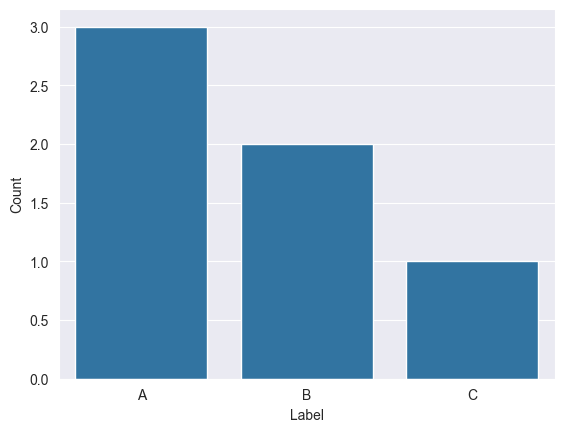

In [7]:
import seaborn as sns
import pandas as pd

# Example DataFrame creation for illustration
data = {'Label': ['A', 'B', 'A', 'C', 'B', 'A']}
df = pd.DataFrame(data)

# Compute value counts for the 'Label' column
label_counts = df['Label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Count']

# Plotting
sns.set_style('darkgrid')
sns.barplot(x=label_counts['Label'], y=label_counts['Count'])


# Tokenizing the urls into individual Tokens and joining them to main coloumn

In [8]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [9]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [10]:
tokenizer.tokenize(phish_data.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [11]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 5.248594600000004 sec


In [12]:
phish_data.sample(5)

,URL,Label,text_tokenized
503923,ashethel.com/sj53ee1,bad,"[ashethel, com, sj, ee]"
49002,homepage.eircom.net/~warpedcgi/,good,"[homepage, eircom, net, warpedcgi]"
394805,musiqueplus.com/recherche/,good,"[musiqueplus, com, recherche]"
13979,maintaptavern.com/wp-content/uploads/thumb-tem...,bad,"[maintaptavern, com, wp, content, uploads, thu..."
192620,genforum.genealogy.com/curran/page7.html,good,"[genforum, genealogy, com, curran, page, html]"


In [13]:
stemmer = SnowballStemmer("english") 

In [17]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 73.62040780000001 sec


In [15]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
403672,newgeorgiaencyclopedia.org/nge/Article.jsp?id=...,good,"[newgeorgiaencyclopedia, org, nge, Article, js...","[newgeorgiaencyclopedia, org, nge, articl, jsp..."
360230,imdb.com/title/tt0218749/,good,"[imdb, com, title, tt]","[imdb, com, titl, tt]"
140348,acronyms.thefreedictionary.com/RESeau+Teleinfo...,good,"[acronyms, thefreedictionary, com, RESeau, Tel...","[acronym, thefreedictionari, com, reseau, tele..."
326922,facebook.com/davidbenoitmusic,good,"[facebook, com, davidbenoitmusic]","[facebook, com, davidbenoitmus]"
486767,mxp2077.com,bad,"[mxp, com]","[mxp, com]"


# Reducing  the Tokens Length by Removing stems and extracting root word from it and attaches it to main column

In [18]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.39932790000000296 sec


In [19]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
428218,scribd.com/doc/15490295/Linux-Server-Hacks-100...,good,"[scribd, com, doc, Linux, Server, Hacks, Indus...","[scribd, com, doc, linux, server, hack, indust...",scribd com doc linux server hack industrialstr...
159240,climateaudit.org/2009/12/21/terence-corcoran-o...,good,"[climateaudit, org, terence, corcoran, on, cli...","[climateaudit, org, terenc, corcoran, on, clim...",climateaudit org terenc corcoran on climateg
109568,exxxtra-small.net/,bad,"[exxxtra, small, net]","[exxxtra, small, net]",exxxtra small net
139560,aavad.com/artistbibliog.cfm?id=1097,good,"[aavad, com, artistbibliog, cfm, id]","[aavad, com, artistbibliog, cfm, id]",aavad com artistbibliog cfm id
251423,twitter.com/VIA_Rail,good,"[twitter, com, VIA, Rail]","[twitter, com, via, rail]",twitter com via rail


In [20]:
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [21]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [22]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [23]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout() 

# Training the data by Using Logistic Regression And MultinomialNB and their results and Dumping those results in a pickle model is as follows 

In [24]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

In [25]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

In [26]:
cv = CountVectorizer()

In [27]:
help(CountVectorizer())

Help on CountVectorizer in module sklearn.feature_extraction.text object:

class CountVectorizer(_VectorizerMixin, sklearn.base.BaseEstimator)
 |  CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |  
 |  Convert a collection of text documents to a matrix of token counts.
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  For an efficiency comparison of the different feature extractors, see
 |  :ref:`sphx_glr_a

In [28]:
feature = cv.fit_transform(phish_data.text_sent)

In [29]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(trainX,trainY)
lr

LogisticRegression()

In [33]:
lr.score(testX,testY)

0.9631344794192388

In [34]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9778499984223645
Testing Accuracy : 0.9631344794192388

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.90      0.97      0.93     36546
        Good       0.99      0.96      0.97    100791

    accuracy                           0.96    137337
   macro avg       0.94      0.96      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

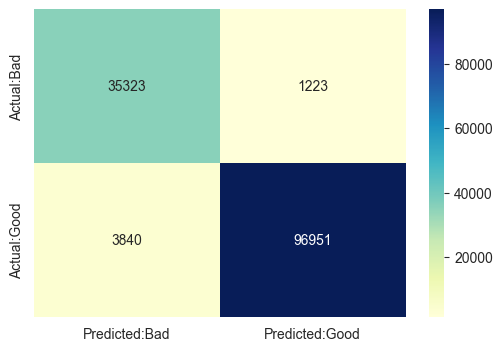

In [35]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [36]:
mnb = MultinomialNB()

In [37]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [38]:
mnb.score(testX,testY)

0.9576152093026642

In [39]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9738695028506659
Testing Accuracy : 0.9576152093026642

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.93      0.92     38334
        Good       0.97      0.97      0.97     99003

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

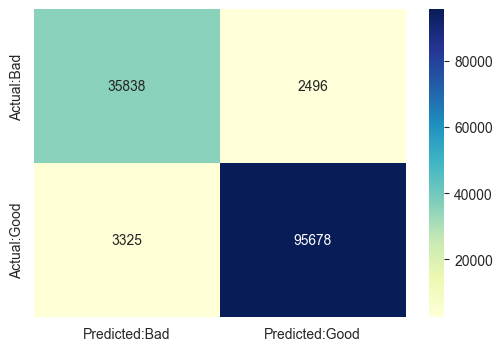

In [40]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<Axes: xlabel='None', ylabel='Accuracy'>

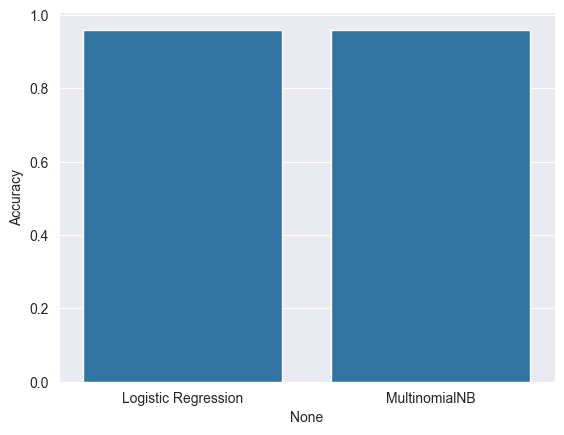

In [41]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(x=acc.index,y=acc.Accuracy)

In [42]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [43]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [44]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [45]:
pipeline_ls.score(testX,testY) 

0.9657921754516263

Training Accuracy : 0.9798329648138754
Testing Accuracy : 0.9657921754516263

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36885
        Good       0.99      0.97      0.98    100452

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

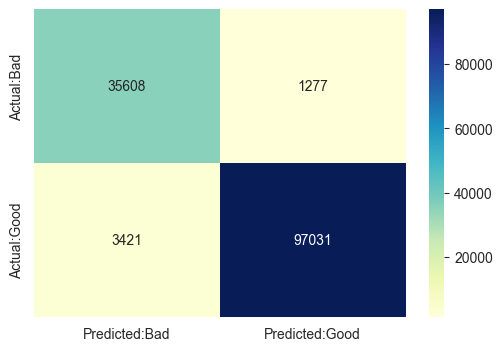

In [46]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [47]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [48]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9657921754516263


In [1]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtue.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

NameError: name 'pickle' is not defined